# Fracta classification task by Gaoyuan Du

Solution:

(1) Load Pipe Dataset and Data Science Packages 

(2) EDA & Data Preprocessing:

    None value
    
    Missing value
    
    Imbalanced data

(3) Feature Engineering:

    Categorical variable encoding
    
    Correlation feature analysis
    
    Feature selection

(4) Build Machine Learning Model & Model Cross Validation:

    SVM
    
    Decision Tree
    
    Random Forest
    
    GBDT
    
    Xgboost

(5) Metrics and result analysis:

    Accuracy on Traing set and Test set
    
    F1 score: Precision and Recall
    
    Confusion matrix
    
    Future work

# Load data science and machine learing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
import tldextract
import re
import itertools
from sklearn import svm
import scipy as sp
import re
import random
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM

# Load pipe dataset

In [2]:
df = pd.read_csv('data_for_test.csv')
df

,pipe_id,install_year,material,diameter,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,env_dat_5,...,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,target
0,P0000000000,1985,D,20.32,623.542175,18.052843,14.161422,10.268579,159.662827,0.010340,...,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0,0
1,P0000000001,1934,C,15.24,644.830017,17.790001,13.830000,9.870000,257.001221,0.007786,...,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0,0
2,P0000000002,1904,C,20.32,604.570007,18.219999,14.350000,10.470000,225.165039,0.014548,...,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0,0
3,P0000000003,1979,D,15.24,573.424011,17.671381,14.132636,10.586646,170.244339,0.014938,...,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0,0
4,P0000000004,1987,D,20.32,583.429993,18.280001,14.350000,10.420000,171.034073,0.025906,...,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56769,P0000055554,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
56770,P0000055555,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
56771,P0000055556,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
56772,P0000055557,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0


# EDA

In [3]:
# Investigate data shape, data types.
print("Data Shape:", df.shape)
print("Data Dtypes:\n", df.dtypes)

Data Shape: (56774, 150)
Data Dtypes:
 pipe_id          object
install_year      int64
material         object
diameter        float64
env_dat_0       float64
                 ...   
env_dat_141     float64
env_dat_142     float64
env_dat_143     float64
env_dat_144     float64
target            int64
Length: 150, dtype: object


In [4]:
# Missing values
print("Missing Values:", df.isnull().sum())

Missing Values: pipe_id           0
install_year      0
material          0
diameter        314
env_dat_0         0
               ... 
env_dat_141     470
env_dat_142     470
env_dat_143      92
env_dat_144      92
target            0
Length: 150, dtype: int64


In [5]:
# Unique values of each feature
for var in df:
    print(df[var].unique().shape[0], "unique Values of", var, df[var].unique(), "\n")

55559 unique Values of pipe_id ['P0000000000' 'P0000000001' 'P0000000002' ... 'P0000055556' 'P0000055557'
 'P0000055558'] 

157 unique Values of install_year [1985 1934 1904 1979 1987 1939 1925 1941 1931 1967 1955 1973 1937 1995
 1969 1949 1924 1991 1974 2009 1958 2016 1972 1947 1986 1917 1966 2013
 1894 1923 1989 1902 1903 1983 1953 1891 1961 1926 1968 1956 1868 1897
 1982 2015 1950 1970 1992 1905 1952 2014 1896 1895 1971 1936 1935 2006
 1898 1933 1990 1964 1899 1888 1993 1951 1998 1892 1997 1959 2004 2001
 2005 1890 1938 1996 1930 1916 1980 1880 1984 1942 2008 1915 1988 2012
 1912 1920 1999 1975 1957 1906 1994 1863 1962 1867 1883 1893 1960 1963
 1940 1944 2000 1946 1928 1976 1922 1981 1911 1887 1914 2010 1861 1977
 2007 1884 1954 1932 1886 1965 1910 1927 1876 1881 1869 1907 1901 1919
 2003 1885 1870 1945 1913 1929 1878 1948 1908 1866 2011 1943 1918 1900
 1921 1889 1871 1978 1865 1862 1875 1882 2002 1909 1872 1874 1877 1873
 1879 1864 2017] 

5 unique Values of material ['D' 'C' 'S' '

7645 unique Values of env_dat_72 [ 0.          2.65738845  2.98547554 ... 11.80056381  6.69479227
  9.55232334] 

78 unique Values of env_dat_73 [0.00000000e+00            nan 5.05228138e+00 3.54412422e-02
 2.42751193e+00 7.05237150e-01 1.13537140e+02 2.66789589e+01
 5.51259880e+01 1.60378203e-01 1.83947220e+01 6.07904720e+00
 1.76688747e+01 1.53483343e+01 7.40165043e+00 5.83819821e-02
 8.99308681e+00 5.08427773e+01 1.64123592e+01 1.23446655e+02
 1.14017935e+01 1.86009998e+01 3.18193722e+00 4.25175333e+00
 3.45307922e+01 9.98030663e-01 5.85110235e+00 1.81207428e+01
 6.64099097e-01 4.98326340e+01 1.51477165e+01 7.41918335e+01
 7.36323090e+01 9.27492917e-01 1.65476644e+00 1.85535812e+01
 3.50934148e-01 1.41789673e+02 3.27665448e+00 2.35626144e+01
 2.48021488e+01 4.71833878e+01 1.45416702e+02 4.87306833e+00
 1.75068531e+01 7.56086683e+00 1.01383486e+01 7.81962128e+01
 4.21833725e+01 5.17911224e+01 1.02732706e+01 7.85001984e+01
 1.15507946e+01 1.09785318e+00 1.82684517e+01 1.77549572e+01
 

843 unique Values of env_dat_77 [0.00000000e+00            nan 2.14691105e+01 2.06120148e+02
 1.93012894e+02 5.94744325e-01 1.56030130e+01 3.99097710e+01
 4.58997965e+00 6.85130644e+00 5.95900383e+01 7.24333115e+01
 8.39393616e+01 5.54920864e+00 9.94940491e+01 1.35337067e+02
 6.78541994e+00 1.56976881e+01 3.55583099e+02 1.61505580e+00
 4.51216278e+01 2.33386963e+02 6.96223907e+01 6.80262074e-02
 2.67926826e+01 1.60216904e+02 5.45864487e+01 2.54173050e+01
 2.24781647e+02 1.42150620e+02 6.72621460e+01 1.05866386e+02
 3.53231277e+01 1.04203796e+02 1.19950981e+01 6.84055939e+01
 3.26071143e-01 1.14924746e+01 2.06478363e+02 1.24920090e+02
 6.27077446e+01 1.07365692e+02 7.74550247e+01 1.76041245e+02
 1.88794594e+01 2.15817307e+02 1.60251617e+01 6.64931870e+00
 1.50941620e+01 1.91253922e+02 1.43877319e+02 1.23043340e-02
 2.36127720e+01 1.02640144e+02 4.25792277e-01 3.64314941e+02
 1.88409866e+02 1.30397577e+01 5.33036053e-01 1.49829302e+01
 1.34138733e+02 4.21135941e+01 2.60659466e+01 5.21922

4696 unique Values of env_dat_128 [4.         0.         1.         ... 2.79293156 1.40228581 0.01121717] 

8493 unique Values of env_dat_129 [  0.          95.61952972  18.34556007 ... 156.50569153 184.64797974
 215.57710266] 

5912 unique Values of env_dat_130 [0.         1.57452786 1.05254126 ... 2.35085177 3.37917733 2.88702083] 

78 unique Values of env_dat_131 [  0.                  nan   6.8401103   29.84742546  82.3679657
   6.1975193   21.53979301  21.20800972  32.72269058   2.78372884
  13.69607258   4.6161747   10.55280495  37.61928177  22.28361893
  13.34774685  22.28976822   9.11520481  15.42561436   2.3087008
  97.77902222   2.76876354  20.12410736   4.51092291   7.04593897
  26.80039024   8.18933201  12.37963963   4.02291012  48.40999222
   6.85911417   4.53606176  24.75709534  18.58191109   8.59729099
   4.73405266  18.57496452   2.06981492  13.84276009   8.04197407
   3.94147801   6.44598007 102.78418732  26.43840408  21.25323868
   8.67498779  54.60801315   0.54410666

2 unique Values of target [0 1] 



In [6]:
# Numbers of target 0 and 1
df.loc[:, 'target'].value_counts()

0    53630
1     3144
Name: target, dtype: int64

# Data preprocessing

In [7]:
# Remove all missing values because they are only a very small part of the total sample. 
# Otherwise, we could use mean value to replace them.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Data Shape:", df.shape)
df.describe()

Data Shape: (55950, 150)


,install_year,diameter,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,env_dat_5,env_dat_6,env_dat_7,...,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,target
count,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,55950.000000,...,55950.000000,5.595000e+04,55950.000000,55950.000000,55950.000000,55950.000000,5.595000e+04,55950.000000,55950.000000,55950.000000
mean,1962.605040,22.691552,611.258822,18.048326,14.180184,10.308012,179.877072,0.009532,0.019388,0.003518,...,8.955540,2.869696e+01,670.039310,23.488614,3341.071939,0.002373,3.375985e-01,0.035764,0.016372,0.055836
std,37.268091,13.479034,42.069185,0.504097,0.301472,0.296989,177.979723,0.008187,0.009958,0.003685,...,7.696806,2.247669e+02,701.223085,12.046040,1260.401946,0.001217,1.273573e-01,0.185703,0.126902,0.229606
min,1861.000000,5.080000,538.679993,15.030037,12.770017,9.450000,0.000000,0.000000,0.000000,0.000000,...,0.869381,8.498414e-09,0.005832,0.012198,0.005832,0.000001,5.892919e-07,0.000000,0.000000,0.000000
25%,1934.000000,15.240000,576.630005,17.820000,13.898915,10.150000,84.231285,0.004346,0.010155,0.000431,...,4.000000,2.974266e-01,215.375977,13.933346,2645.496338,0.001408,2.673141e-01,0.000000,0.000000,0.000000
50%,1964.000000,20.320000,606.099976,18.070024,14.230000,10.330000,149.904938,0.008332,0.020543,0.002061,...,6.000000,1.424003e+00,415.527466,24.000000,3359.478271,0.002425,3.394583e-01,0.000000,0.000000,0.000000
75%,1999.000000,20.320000,644.017639,18.320000,14.410000,10.520000,221.540615,0.012059,0.030000,0.005570,...,12.000000,6.617951e+00,852.726440,33.000000,4130.644043,0.003334,4.173808e-01,0.000000,0.000000,0.000000
max,2017.000000,121.920000,717.700012,19.209999,14.890000,10.890000,2476.000000,0.089513,0.030000,0.023247,...,56.000000,8.699786e+03,9278.880859,65.000000,9640.180664,0.006568,9.740916e-01,1.000000,1.000000,1.000000


In [8]:
# Check and fill missing data
df.isnull().any()
print(df.isnull().sum())

pipe_id         0
install_year    0
material        0
diameter        0
env_dat_0       0
               ..
env_dat_141     0
env_dat_142     0
env_dat_143     0
env_dat_144     0
target          0
Length: 150, dtype: int64


# Feature engineering

In [9]:
# Categorical variable encoding by most popular one-hot encoding method. 
# Also, we could use label encoding, binary encoding, hashing encoding and so on.  
new_color = pd.get_dummies(df['material'])
material = pd.concat([new_color],axis=1)
material

,A,C,D,O,S
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
55945,0,0,1,0,0
55946,0,0,1,0,0
55947,0,0,1,0,0
55948,0,0,1,0,0


In [10]:
# Because pipe_id is not a fundamental property of the pipe, so we won't use this feeature in following model.
df.drop(['pipe_id'], axis=1)

,install_year,material,diameter,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,env_dat_5,env_dat_6,...,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,target
0,1985,D,20.32,623.542175,18.052843,14.161422,10.268579,159.662827,0.010340,0.030000,...,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0,0
1,1934,C,15.24,644.830017,17.790001,13.830000,9.870000,257.001221,0.007786,0.030000,...,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0,0
2,1904,C,20.32,604.570007,18.219999,14.350000,10.470000,225.165039,0.014548,0.006675,...,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0,0
3,1979,D,15.24,573.424011,17.671381,14.132636,10.586646,170.244339,0.014938,0.005481,...,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0,0
4,1987,D,20.32,583.429993,18.280001,14.350000,10.420000,171.034073,0.025906,0.008322,...,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55945,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,0.030000,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55946,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,0.030000,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55947,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,0.030000,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55948,2016,D,20.32,610.280029,18.280001,14.340000,10.400000,190.049469,0.010628,0.030000,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0


In [11]:
# Concatenate new encoding features to the original table
data = pd.concat([material, df], axis=1)
data

,A,C,D,O,S,pipe_id,install_year,material,diameter,env_dat_0,...,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,target
0,0,0,1,0,0,P0000000000,1985,D,20.32,623.542175,...,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0,0
1,0,1,0,0,0,P0000000001,1934,C,15.24,644.830017,...,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0,0
2,0,1,0,0,0,P0000000002,1904,C,20.32,604.570007,...,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0,0
3,0,0,1,0,0,P0000000003,1979,D,15.24,573.424011,...,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0,0
4,0,0,1,0,0,P0000000004,1987,D,20.32,583.429993,...,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55945,0,0,1,0,0,P0000055554,2016,D,20.32,610.280029,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55946,0,0,1,0,0,P0000055555,2016,D,20.32,610.280029,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55947,0,0,1,0,0,P0000055556,2016,D,20.32,610.280029,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0
55948,0,0,1,0,0,P0000055557,2016,D,20.32,610.280029,...,6.000000,0.719997,170.973465,26.000000,2504.886719,0.002627,0.253106,0.0,0.0,0


In [12]:
# Statistical analysis of distribution of two classes.
df_flag1 = data[data.target>0]
df_flag0 = data[data.target<1]
print('The shape of whole dataset')
print(data.shape)
print('The shape of sub dataset with target=1')
print(df_flag1.shape)
print('The shape of sub dataset with target=0')
print(df_flag0.shape)
print('The ratio of target1 to target0 is', df_flag1.shape[0] / df_flag0.shape[0])

The shape of whole dataset
(55950, 155)
The shape of sub dataset with target=1
(3124, 155)
The shape of sub dataset with target=0
(52826, 155)
The ratio of target1 to target0 is 0.05913754590542536


In [13]:
# Make data balanced
# Add new DataFrame on specific index row
def insert_row_intoDataFrame(idx, df, df_insert):
    df_bef = df.iloc[:idx, ]
    df_aft = df.iloc[idx:, ]
    df = df_bef.append(df_insert).append(df_aft).reset_index(drop = True)
    return df

# Oversample on target = 1
num_sample = 5
for i in range(num_sample):                   
    ran = np.random.uniform(0,1)
    idx = int(ran*(data.shape[0]))
    df_raw = insert_row_intoDataFrame(idx, data, df_flag1)   
data = shuffle(data)   
data = shuffle(data)
print('The shape of whole dataset after oversampling')
print(data.shape)

The shape of whole dataset after oversampling
(55950, 155)


In [14]:
# Undersample on target = 0
X_raw = data.drop(['target', 'pipe_id', 'material'], axis=1)
y_raw = data['target']
print('Before resample')
print('Dataset rows = {}'.format(X_raw.shape[0]))
rus = RandomUnderSampler(random_state=42)
X_arr, y_arr = rus.fit_resample(X_raw, y_raw)
print('After resample')
print('Dataset rows = {}'.format(X_arr.shape[0]))

Before resample
Dataset rows = 55950
After resample
Dataset rows = 6248


In [15]:
# Balanced dataset now
X = pd.DataFrame(X_arr, columns=X_raw.columns)
y = pd.DataFrame(y_arr, columns=['target'])
print('number of rows in target 0 sample = {}'.format(y[y.target<1].shape[0]))
print('number of rows in target 1 sample = {}'.format(y[y.target>0].shape[0]))

number of rows in target 0 sample = 3124
number of rows in target 1 sample = 3124


In [16]:
X

,A,C,D,O,S,install_year,diameter,env_dat_0,env_dat_1,env_dat_2,...,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144
0,0,0,1,0,0,2015,30.48,694.109985,18.139999,13.900000,...,226.036636,6.000000,0.403478,165.314240,30.000000,2477.215332,0.003031,0.250310,0.0,0.0
1,0,0,1,0,0,1999,20.32,591.479980,18.320000,14.410000,...,276.438263,5.000000,2.960026,277.976685,39.000000,4279.946777,0.003941,0.432467,0.0,0.0
2,0,1,0,0,0,1952,10.16,708.153198,17.776384,13.723267,...,374.666168,8.000000,0.633385,302.673767,24.000000,2962.709473,0.002425,0.299367,0.0,0.0
3,0,1,0,0,0,1928,20.32,661.655762,18.805813,14.478965,...,299.571503,5.000000,0.615168,152.856537,31.000000,2975.985107,0.003132,0.300708,0.0,0.0
4,0,0,1,0,0,1990,20.32,560.510254,18.481567,14.520835,...,708.982483,24.671934,12.744399,442.612732,20.335966,2696.734619,0.002055,0.272491,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,0,1,0,0,0,1936,15.24,593.280029,18.520000,14.490000,...,222.295563,3.000000,0.165394,148.571808,45.000000,3858.005371,0.004547,0.389832,0.0,0.0
6244,0,1,0,0,0,1964,20.32,576.630005,18.330000,14.500000,...,224.712021,3.182177,30.651230,1886.138672,9.570160,5496.583008,0.000967,0.555402,0.0,0.0
6245,0,0,1,0,0,1983,20.32,591.741211,17.361088,13.957657,...,983.390930,28.000000,11.870085,716.937866,17.000000,2947.769775,0.001718,0.297857,0.0,0.0
6246,0,1,0,0,0,1934,20.32,633.089661,17.579987,13.839997,...,129.638031,1.940593,2.767576,274.727875,41.645260,3466.828369,0.004208,0.350306,0.0,0.0


In [17]:
# Check correlation of features
df_corr = data.corr()
# filter out elements which are greater than 0.85 threshold
print(df_corr[df_corr.iloc[:,:]>0.85])

               A    C    D    O    S  install_year  diameter  env_dat_0  \
A            1.0  NaN  NaN  NaN  NaN           NaN       NaN        NaN   
C            NaN  1.0  NaN  NaN  NaN           NaN       NaN        NaN   
D            NaN  NaN  1.0  NaN  NaN           NaN       NaN        NaN   
O            NaN  NaN  NaN  1.0  NaN           NaN       NaN        NaN   
S            NaN  NaN  NaN  NaN  1.0           NaN       NaN        NaN   
...          ...  ...  ...  ...  ...           ...       ...        ...   
env_dat_141  NaN  NaN  NaN  NaN  NaN           NaN       NaN        NaN   
env_dat_142  NaN  NaN  NaN  NaN  NaN           NaN       NaN        NaN   
env_dat_143  NaN  NaN  NaN  NaN  NaN           NaN       NaN        NaN   
env_dat_144  NaN  NaN  NaN  NaN  NaN           NaN       NaN        NaN   
target       NaN  NaN  NaN  NaN  NaN           NaN       NaN        NaN   

             env_dat_1  env_dat_2  ...  env_dat_136  env_dat_137  env_dat_138  \
A                 

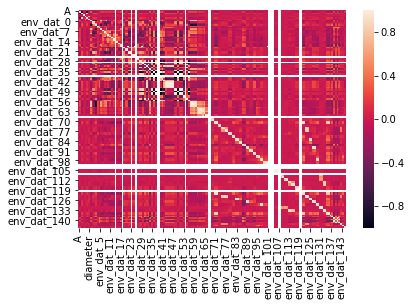

In [18]:
# Heatmap of correlation of features
corr = data.corr()
sns.heatmap(corr)
plt.show()

# Build Machine Learning Model & Model Validation

In [19]:
def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

In [20]:
# Split train & test dataset: 80% : 20%
trainSize = int(0.8*(X.shape[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=trainSize, random_state=24)

In [21]:
# SVM

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


======Confusion Matrix=======


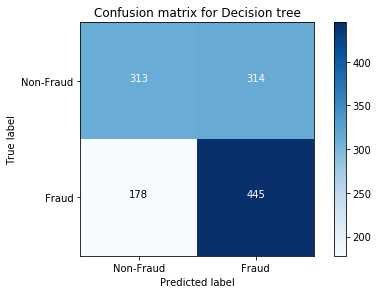



======Model Accuracy=======
SVM Train Accuracy ::  0.6216486594637856
SVM Test Accuracy  ::  0.6064


======Classification Report=======
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       627
           1       0.59      0.71      0.64       623

    accuracy                           0.61      1250
   macro avg       0.61      0.61      0.60      1250
weighted avg       0.61      0.61      0.60      1250



In [22]:
SVM = svm.SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
cnf_matrix_dtree=confusion_matrix(y_test,y_pred)
print("======Confusion Matrix=======") 
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for Decision tree')
plt.show()
print('\n')
print("======Model Accuracy=======") 
print ("SVM Train Accuracy :: ", accuracy_score(y_train, SVM.predict(X_train)))
print ("SVM Test Accuracy  :: ", accuracy_score(y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(y_test,y_pred))

In [26]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [23]:
# 10-fold cross validation
cross_val_score(SVM, X_train, y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [ ]:
# Decision tree

In [ ]:
%%time
dtree=DecisionTreeClassifier(max_depth=100,criterion='entropy')
# Feature selection
selector = SelectFromModel(estimator = dtree, threshold = 'median')
X_train_embed = selector.fit_transform(X_train, y_train)
X_test_embed = X_test.T[selector.get_support()]
X_test_embed = X_test_embed.T
print(X_train.shape)
print(X_train_embed.shape)
# Train model
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
cnf_matrix_dtree=confusion_matrix(y_test,y_pred)
print("======Confusion Matrix=======") 
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for Decision tree')
plt.show()
print('\n')
print("======Model Accuracy=======") 
print ("DT Train Accuracy :: ", accuracy_score(y_train, dtree.predict(X_train)))
print ("DT Test Accuracy  :: ", accuracy_score(y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(y_test,y_pred))

In [ ]:
cross_val_score(dtree, X_train, y_train, cv=10)

In [ ]:
# Random forest

In [ ]:
score = make_scorer(roc_auc_score)
parameters = {'n_estimators':(10,15,20),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}
rfc = RandomForestClassifier(random_state=42, warm_start=False, class_weight='balanced')
grid_obj = GridSearchCV(rfc, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
rfc = grid_obj.best_estimator_
print('Train Dataset score {}'.format(rfc.score(X_train, y_train)))
print('Test Dataset score {}'.format(rfc.score(X_test, y_test)))

In [ ]:
cross_val_score(rfc, X_train, y_train, cv=10)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# GBDT

In [ ]:
score = make_scorer(roc_auc_score)
parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.1,1.0),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}
GBDT = GradientBoostingClassifier(random_state=42, warm_start=False)
grid_obj = GridSearchCV(GBDT, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
GBDT = grid_obj.best_estimator_

print('Train Dataset score {}'.format(GBDT.score(X_train, y_train)))
print('Test Dataset score {}'.format(GBDT.score(X_test, y_test)))

In [ ]:
cross_val_score(GBDT, X_train, y_train, cv=10)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# Xgboost

In [ ]:
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cnf_matrix_dtree=confusion_matrix(y_test,y_pred)
print("======Confusion Matrix=======") 
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for Decision tree')
plt.show()
print('\n')
print("======Model Accuracy=======") 
print ("Xgboost Train Accuracy :: ", accuracy_score(y_train, xgb.predict(X_train)))
print ("Xgboost Test Accuracy  :: ", accuracy_score(y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(y_test,y_pred))

In [ ]:
cross_val_score(xgb, X_train, y_train, cv=10)

# Result analysis

After modeling and comparing performance of these classifieres below, we could know:

On traing set accuracy, Decision tree performs best (98.9%) than Random forest (96.5%), GBDT (81.6%) and Xgboost(81.1%).

On testing set accuracy, Xgboost and GBDT perform best (78%), and SVM perfoms worst (66.5%).

According to f1-score, Xgboost performs best (0.76) and SVM performs worst (0.64).

Due to analysis above, Xgboost performs best in thses models.

In the future, we could do more exploration and analysis in deep learning models and feature engineering, combined with real time business requirements.